# Front Statistics

In [11]:
# imports
from importlib import reload

import os
import numpy as np

import pandas
import seaborn as sns

from matplotlib import pyplot as plt
import cartopy.crs as ccrs

from fronts.plotting import spatial


# Load

In [2]:
front_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Fronts', 'LLC4320_SST144_SSS40_super_test.parquet')
tbl = pandas.read_parquet(front_file)

In [3]:
tbl.head()

,lat,lon,row,col,datetime,UID,filename,pp_file,pp_root,field_size,...,SSSmax,SSSmin,SSS10,SSS90,SSSmu,Divb2max,Divb2min,Divb210,Divb290,Divb2mu
0,56.752953,-170.447922,11465,10890,2011-09-18,13161467530955208,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,,llc4320_sst144_sss40_extract.json,64,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,56.796970,-155.677078,11469,11599,2011-09-18,131614679702432292,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,,llc4320_sst144_sss40_extract.json,64,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,56.818966,-155.635422,11471,11601,2011-09-18,131614681902436458,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,,llc4320_sst144_sss40_extract.json,64,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,56.631676,-152.864578,11454,11734,2011-09-18,131614663172713542,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,,llc4320_sst144_sss40_extract.json,64,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,56.917801,-152.114578,11480,11770,2011-09-18,131614691782788542,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,,llc4320_sst144_sss40_extract.json,64,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


## Cut down to good processing

In [4]:
keep = tbl.pp_type == 0
np.sum(keep)

np.int64(2478120)

In [5]:
front_tbl = tbl[keep].copy()

# Examine distributions

## Mean

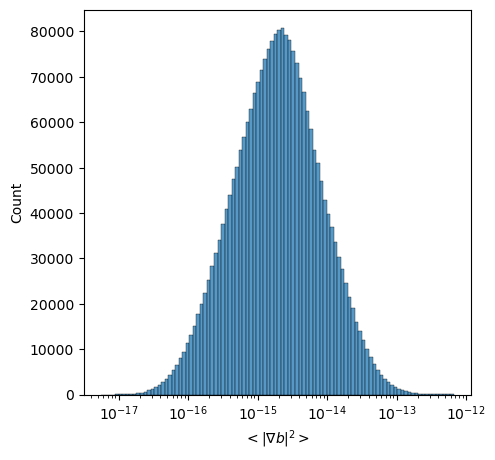

In [6]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
sns.histplot(front_tbl.Divb2mu, bins=100, log_scale=True)
#
ax.set_xlabel(r'$<|\nabla b|^2>$')
#
plt.show()

## 90%

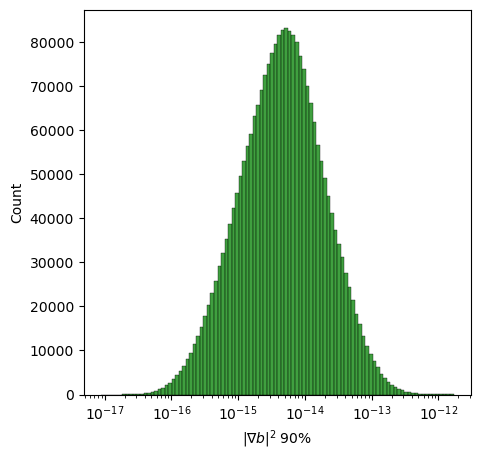

In [7]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
sns.histplot(front_tbl.Divb290, bins=100, log_scale=True, color='green')

ax.set_xlabel(r'$|\nabla b|^2 \; 90\%$')
#
plt.show()

# Geography

## Mean

In [19]:
reload(spatial)
_, hp_lons, hp_lats, hp_Divb2mu = spatial.evals_to_healpix(
   np.log10(front_tbl.Divb2mu.values), front_tbl.lon.values, front_tbl.lat.values, 64) 

In [10]:
hp_Divb2mu.size

49152

In [15]:
type(hp_Divb2mu)

numpy.ma.MaskedArray

In [16]:
hp_Divb2mu.mask

array([ True,  True,  True, ...,  True,  True,  True])

### Plot

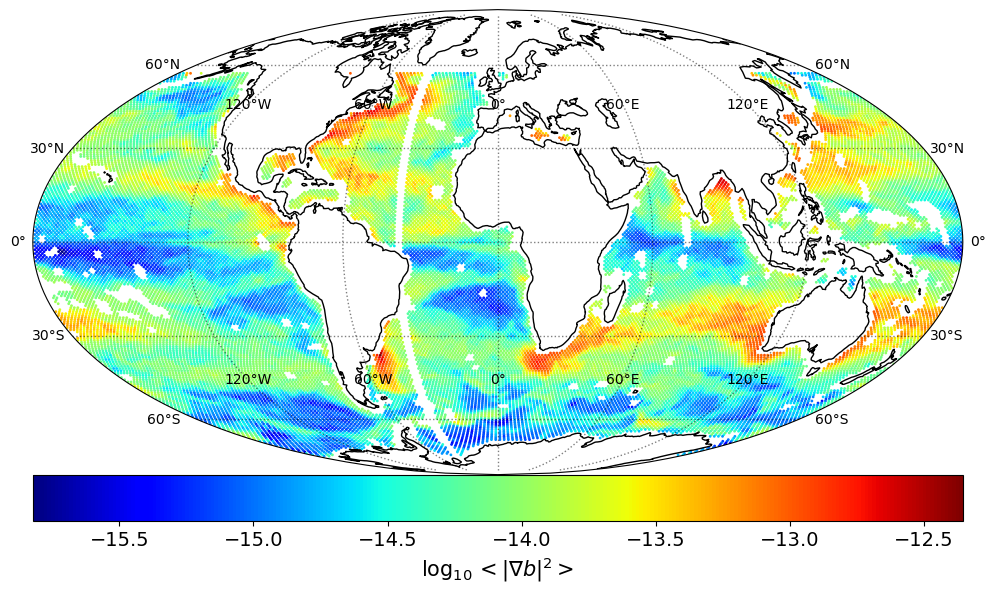

In [23]:
reload(spatial)
_ = spatial.plot_hp(hp_lons, hp_lats, hp_Divb2mu, 
                   lbl=r'$\log_{10} <|\nabla b|^2>$')